In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import asyncio
import numpy as np


LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

In [32]:
# Connect to the Artemis Device
ble.connect()

2022-05-13 15:59:52,727 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:A5:6D:02:3C
2022-05-13 15:59:56,537 | INFO     |: Connected to C0:83:A5:6D:02:3C


In [33]:
# Instantiate RobotControl class (in controller.py)
from controller import *
rc = RobotControl(ble)

In [34]:
# Start spinning!
rc.spin_360(87)

In [35]:
# Make sure to call this after the spin motion stops. This terminates data collection.
rc.stop_recording()

In [36]:
# Collect & display the full sensor data
cols = [
    "time", "dist_r", "dist_f", "acc_x", "acc_y", "acc_z", "gyr_x",
    "gyr_y", "gyr_z", "mag_x", "mag_y", "mag_z", "temp"
]
sensor_data = pd.DataFrame(rc.sensor_arr, columns=cols)

In [37]:
sensor_data

,time,dist_r,dist_f,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,temp
0,3.186,152.0,101.0,-976.740,-166.992,80.566,0.282,1.259,0.534,-427.500,-445.200,299.549,30.952
1,3.877,152.0,110.0,-968.261,-160.156,89.843,0.740,0.396,0.465,-428.250,-448.649,308.850,30.857
2,4.536,157.0,146.0,-987.304,-145.996,76.171,0.694,-1.664,1.992,-426.450,-455.399,322.649,30.952
3,5.122,177.0,150.0,-974.121,-148.925,59.570,1.916,1.381,0.694,-432.750,-443.549,327.450,30.952
4,5.722,240.0,103.0,-983.398,-162.109,57.617,-2.700,0.526,1.435,-434.100,-440.700,338.399,30.952
5,6.307,264.0,83.0,-980.957,-158.203,46.875,0.221,1.839,0.648,-434.100,-438.000,344.399,31.000
6,6.862,240.0,80.0,-990.234,-192.871,51.757,1.145,4.175,0.450,-435.899,-424.500,349.799,30.857
7,7.462,249.0,96.0,-989.746,-185.580,55.175,1.380,2.396,2.427,-432.299,-405.149,349.490,30.952
8,8.031,307.0,147.0,-981.933,-193.359,50.292,-3.335,0.564,-2.854,-432.450,-405.000,350.250,30.809
9,8.617,307.0,219.0,-974.609,-190.917,64.941,1.282,1.755,0.572,-430.200,-396.750,346.350,31.000


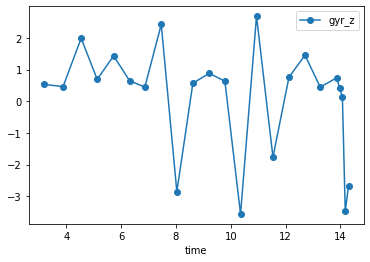

In [38]:
# Currently, only configured to plot the "gyr_z" values
plot_sensor_data(rc.sensor_arr)

In [39]:
# This is where we do the polar plot stuff...
import math
from matplotlib import pyplot as plt

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265 3.4906585  3.83972435
 4.1887902  4.53785606 4.88692191 5.23598776 5.58505361 5.93411946]
Actual number of data points (including the excluded latter points collected after spin stopped): 23

Plot data:
Time: [3.186, 3.877, 4.536, 5.122, 5.722, 6.307, 6.862, 7.462, 8.031, 8.617, 9.217, 9.786, 10.357, 10.941, 11.541, 12.126, 12.711, 13.267]
Distance: [101.0, 110.0, 146.0, 150.0, 103.0, 83.0, 80.0, 96.0, 147.0, 219.0, 197.0, 195.0, 216.0, 283.0, 216.0, 174.0, 163.0, 179.0]
Angle (rad):  ['0.00', '0.35', '0.70', '1.05', '1.40', '1.75', '2.09', '2.44', '2.79', '3.14', '3.49', '3.84', '4.19', '4.54', '4.89', '5.24', '5.59', '5.93']


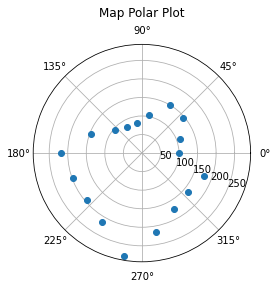

In [54]:
times = list(sensor_data["time"][:18])
tofs = sensor_data["dist_f"][:18]
ang_vels = list(sensor_data["gyr_z"])
# ang_vels = list(np.tile(np.array([22.5]), len(tofs)))
num_points = len(ang_vels)

# thetas = [0]
# for i in range(1, num_points):
#     thetas.append(thetas[i-1] + math.radians(ang_vels[i] * (times[i] - times[i-1])))
thetas = np.linspace(0, 2 * np.pi, len(tofs), endpoint=False)
print(thetas)

xs = np.cos(thetas) * tofs
ys = np.sin(thetas) * tofs

r = np.array(tofs)
theta = np.array(thetas)

print(f"Actual number of data points (including the excluded latter points collected after spin stopped): {num_points}\n")

print("Plot data:")
print(f"Time: {repr(times)}")
print(f"Distance: {repr(list(r))}")
print("Angle (rad): ", ["{:0.2f}".format(x) for x in theta ])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r, 'o')
# ax.set_rmax(2000)
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Map Polar Plot", va='bottom')
plt.show()

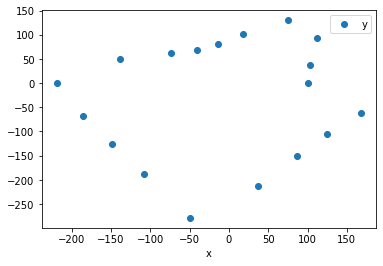

In [55]:
df = pd.concat([xs.rename("x"), ys.rename("y")], axis=1)
df.plot(x="x", y="y", marker="o", linestyle='none')
plt.show()

In [47]:
ble.disconnect()

2022-05-13 16:03:27,560 | INFO     |: Disconnected from B45C71B2-3BCA-639D-7AF3-3C14C2003C3E
